In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data
data = make_blobs(n_samples=3200, n_features=2, 
                           centers=6, cluster_std=1.8,random_state=101)

In [4]:
# data


In [5]:
len(data)

2

In [6]:
data[1][:3]

array([5, 4, 4])

In [7]:
data[0].shape

(3200, 2)

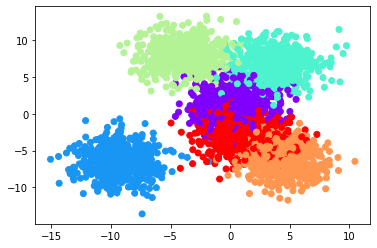

In [8]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [9]:
# data[0]

In [10]:
data[0].shape

(3200, 2)

In [11]:
data[0][0]

array([ 0.28189604, -2.58518821])

In [12]:
data[1]

array([5, 4, 4, ..., 5, 0, 4])

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=4)

In [15]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [16]:
kmeans.predict(np.array([-10,10]).reshape(1,-1))

array([3], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[ 2.45433454,  4.74636409],
       [ 2.50052433, -4.17992334],
       [-9.3050635 , -6.44148715],
       [-3.79232683,  7.85821029]])

In [18]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

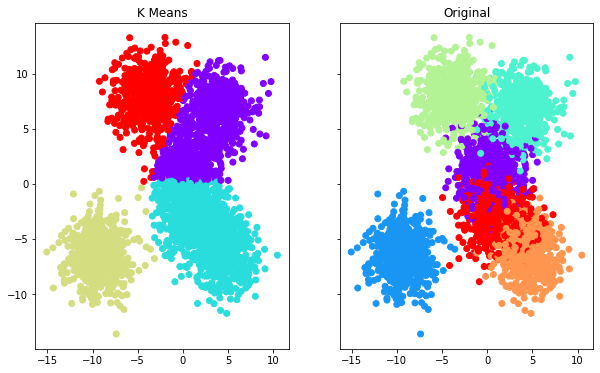

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [20]:
# run the above with k=2,3,4

In [21]:
##########################################
#
# try to find k for generated 6 clusters and 3200 samples (All other params are the same)
# 1. loop over k = 2..20
# 2. calculate sse = sigma(point-center)^2 = (x-x_center)^2 + (y-y_center)^2
# 3. draw sse vs k (sse for each k is the sum of all centroids for each k)
# 4. choose the elbow k
# 5. which parameter will make choosing k more difficult (when creating the blobs)

In [22]:
sse = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k).fit(data[0])
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.labels_
    curr_see = 0
    for i in range(len(data[0])):
        curr_cluster = pred_clusters[i]
        curr_center = centroids[curr_cluster]
        curr_see += (data[0][i, 0] - curr_center[0])**2 + (data[0][i, 1] - curr_center[1])**2
    print(k, curr_see)
    sse.append(curr_see)

2 105442.14761065187
3 51270.265971968875
4 35163.2759328302
5 22764.625635107277
6 18849.610324807512
7 17364.029242131564
8 16072.20065953649
9 14850.080129420947
10 13593.124057576055
11 12562.92147907673
12 11601.163309616164
13 10756.332680605798
14 10066.472879677334
15 9366.228458597283
16 8833.751471639154
17 8353.518184352077
18 7932.054552507898
19 7550.6708630517915


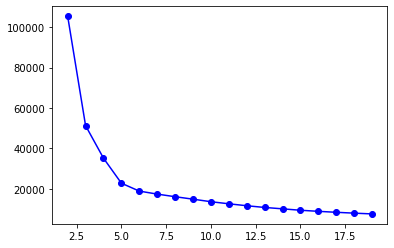

In [23]:
plt.plot(range(2,20), sse, "bo-")

In [24]:
data[0]

array([[ 0.28189604, -2.58518821],
       [ 4.79140959, -5.91897358],
       [ 3.99300447, -6.63468576],
       ...,
       [-0.63384087, -2.61527239],
       [-1.45990175,  1.76759085],
       [ 2.20387147, -2.49699684]])

In [25]:
#########################
# find best k using silouette score

2 0.4322390298372203
3 0.5304962670108107
4 0.5087742347858927
5 0.5171291836650102
6 0.48311220757774026
7 0.4551956893296321
8 0.4252729189051135
9 0.40146581152177985
10 0.32980991819445593
11 0.3191014102806803
12 0.32501356205937143
13 0.3307748585472355
14 0.330789525073221
15 0.3279238300589464
16 0.32745565227115053
17 0.3251278442580244
18 0.32966085095511
19 0.3258362658318156


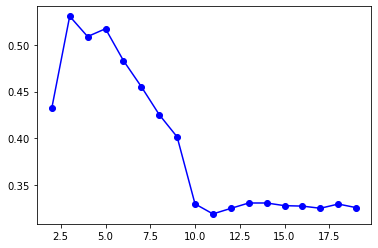

In [26]:
score = []
from sklearn.metrics import silhouette_score
for k in range(2,20):
    kmean = KMeans(n_clusters=k).fit(data[0])
    pred_cl = kmean.labels_
    s_score = silhouette_score(data[0], pred_cl)
    print(k, s_score)
    score.append(s_score)

plt.plot(range(2,20), score, "bo-")